In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

from PIL import Image
import urllib
import json
import os

## Premier League

In [2]:
big_six_cm = {
    '8456': { # Manchester City
        'low': '#00285e',
        'high': '#97c1e7'
    },
    '9825': { # Arsenal
        'low':'#063672',
        'high':'#db0007'
    },
    '8650': { # Liverpool
        'low': '#00B2A9',
        'high': '#C8102E'
    },
    '10252':{ # Aston Villa
        'low':'#95bfe5',
        'high':'#670e36'
    },
    '8586': { # Tottenham
        'low': '#0e9ca5',
        'high': '#132257'
    },
    '8455': { # Chelsea
        'low': '#d1d3d4',
        'high': '#034694'
    },
    '10261':{ # Newcastle United
        'low':'#241F20',
        'high':'#41B6E6'
    },
    '10260':{ # Manchester United
        'low':'#DBA111',
        'high':'#da020e'
    },
    '8654':{ # West Ham
        'low':'#2dafe5',
        'high':'#7c2c3b'
    },
    '9826':{ # Crystal Palace
        'low':'#1B458F',
        'high':'#C4122E'
    },
    '10204':{ # Brighton
        'low':'#d1d3d4',
        'high':'#005daa'
    },
#     '8197':{ # Leicester City
#         'low':'#fdbe11',
#         'high':'#0053a0'
#     },
    '8678':{ # AFC Bournemouth
        'low':'#DA291C',
        'high':'#000000'
    },
    '9879':{ # Fulham
        'low':'#000000',
        'high':'#CC0000'
    },
    '8602':{ # Wolves
        'low':'#231F20',
        'high':'#FDB913'
    },
    '8668':{ # Everton
        'low':'#dadada',
        'high':'#003399'
    },
    '9937':{ # Brentford
        'low':'#fbb800',
        'high':'#e30613'
    },
    '10203':{ # Nottingham Forest
        'low':'#dadada',
        'high':'#DD0000'
    },
    '8346':{ # Luton Town
        'low':'#F78F1E',
        'high':'#002D62'
    },
    '8191':{ # Burnley
        'low':'#99D6EA',
        'high':'#6C1D45'
    },
    '8657':{ # Sheffield United
        'low':'#000000',
        'high':'#EE2737'
    }
}

## Bundesliga

In [24]:
big_six_cm = {
    '8178': { # Bayer Leverkusen
        'low': '#e32221',
        'high': '#000000'
    },
    '10269': { # Stuttgart
        'low':'#e32219',
        'high':'#ffed00'
    },
    '9823': { # Bayern Munchen
        'low': '#dc052d',
        'high': '#0066b2'
    },
    '178475':{ # RB Leipzig
        'low':'#dd0741',
        'high':'#001f47'
    },
    '9789': { # Dortmund
        'low': '#000000',
        'high': '#fde100'
    },
    '9810': { # Frankfurt
        'low': '#000000',
        'high': '#e1000f'
    },
    '8226':{ # Hoffenheim
        'low':'#f4a856',
        'high':'#1c63b7'
    },
    '94937':{ # FC Heidenheim 
        'low':'#e2001a',
        'high':'#003b79'
    },
    '8697':{ # Werder Bremen
        'low':'#1d9053',
        'high':'#000001'
    },
    '8358':{ # Freiburg
        'low':'#fd1220',
        'high':'#000000'
    },
    '8406':{ # Augsburg
        'low':'#ffd42e',
        'high':'#46714d'
    },
    '8721':{ # Wolfsburg
        'low':'#0c4011',
        'high':'#65b32e'
    },
    '9905':{ # Mainz
        'low':'#aae2f2',
        'high':'#fd1220'
    },
    '9788':{ # M'gladbach
        'low':'#000000',
        'high':'#28a144'
    },
    '8149':{ # Union Berlin
        'low':'#fcea10',
        'high':'#d4011d'
    },
    '9911':{ # Bochum
        'low':'#000000',
        'high':'#005ca9'
    },
    '8722':{ # FC Koln
        'low':'#000000',
        'high':'#e20612'
    },
    '8262':{ # Darmstadt
        'low':'#ff6600',
        'high':'#004f9f'
    }
}

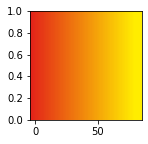

In [5]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mcolors.to_rgb(c1))
    c2=np.array(mcolors.to_rgb(c2))
    return mcolors.to_hex((1-mix)*c1 + mix*c2)

# Example with Brentford
c1=big_six_cm['10269']['low']
c2=big_six_cm['10269']['high']
n=83

fig, ax = plt.subplots(figsize=(2, 2))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=10) 
plt.show()

In [7]:
df = pd.read_csv('C:/Users/jeffr/OneDrive/Desktop/Github Activities/Sports_Analysis/Football/11 Rolling xG/Data/54.csv', index_col=0)
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M:%S')
df = df.sort_values(by='date').reset_index(drop=True)
df.head(164)

,match_id,date,referee,variable,value,venue,team_id,team_name,team_lineup
0,4221721,2023-08-18 18:30:00,Felix Zwayer,xG_for,0.55,H,8697,Werder Bremen,4/04/2002
1,4221721,2023-08-18 18:30:00,Felix Zwayer,xG_ag,2.85,H,8697,Werder Bremen,4/04/2002
2,4221721,2023-08-18 18:30:00,Felix Zwayer,xG_for,2.85,A,9823,Bayern München,4/04/2002
3,4221721,2023-08-18 18:30:00,Felix Zwayer,xG_ag,0.55,A,9823,Bayern München,4/04/2002
4,4221727,2023-08-19 13:30:00,Sven Jablonski,xG_for,2.65,A,8358,Freiburg,4/04/2002
...,...,...,...,...,...,...,...,...,...
159,4221764,2023-09-23 13:30:00,Marco Fritz,xG_ag,0.56,H,8406,Augsburg,4/04/2002
160,4221757,2023-09-23 13:30:00,Robert Hartmann,xG_ag,5.05,A,9911,Bochum,4/04/2002
161,4221764,2023-09-23 13:30:00,Marco Fritz,xG_for,0.56,A,9905,Mainz 05,4/04/2002
162,4221764,2023-09-23 13:30:00,Marco Fritz,xG_ag,0.82,A,9905,Mainz 05,4/04/2002


In [8]:
def get_xG_rolling_data(team_id, window=10, data=df):
    '''
    This function returns xG rolling average figures for a specific team.
    '''
    df = data.copy()
    df_xg = df[(df['team_id'] == team_id) & (df['variable'].isin(['xG_for', 'xG_ag']))]
    
    # Pivot the dataframe correctly
    df_xg_pivot = df_xg.pivot_table(
        index=['date', 'match_id', 'team_id', 'team_name'],
        columns='variable',
        values='value'
    ).reset_index()
    
    # Flatten the columns multi-index
    df_xg_pivot.columns.name = None  # Remove the name of the columns index
    df_xg_pivot.columns = [col if col is not None else 'value' for col in df_xg_pivot.columns]

    df_xg_pivot.rename(columns={'xG_for': 'xG_for', 'xG_ag': 'xG_ag'}, inplace=True)

    # Compute rolling averages
    df_xg_pivot['rolling_xG_for'] = df_xg_pivot['xG_for'].rolling(window=window, min_periods=0).mean()
    df_xg_pivot['rolling_xG_ag'] = df_xg_pivot['xG_ag'].rolling(window=window, min_periods=0).mean()
    df_xg_pivot['rolling_diff'] = df_xg_pivot['rolling_xG_for'] - df_xg_pivot['rolling_xG_ag']
    
    return df_xg_pivot

In [10]:
get_xG_rolling_data(10269, data=df)

,date,match_id,team_id,team_name,xG_ag,xG_for,rolling_xG_for,rolling_xG_ag,rolling_diff
0,2023-08-19 13:30:00,4221729,10269,VfB Stuttgart,0.83,3.13,3.130000,0.830000,2.300000
1,2023-08-25 18:30:00,4221731,10269,VfB Stuttgart,1.76,1.13,2.130000,1.295000,0.835000
2,2023-09-02 13:30:00,4221747,10269,VfB Stuttgart,1.05,1.74,2.000000,1.213333,0.786667
3,2023-09-16 13:30:00,4221752,10269,VfB Stuttgart,0.97,1.56,1.890000,1.152500,0.737500
4,2023-09-22 18:30:00,4221765,10269,VfB Stuttgart,0.16,2.29,1.970000,0.954000,1.016000
5,2023-09-30 13:30:00,4221770,10269,VfB Stuttgart,0.74,2.50,2.058333,0.918333,1.140000
6,2023-10-07 13:30:00,4221783,10269,VfB Stuttgart,1.23,2.69,2.148571,0.962857,1.185714
7,2023-10-21 13:30:00,4221785,10269,VfB Stuttgart,0.62,1.38,2.052500,0.920000,1.132500
8,2023-10-28 13:30:00,4221804,10269,VfB Stuttgart,1.73,3.61,2.225556,1.010000,1.215556
9,2023-11-05 16:30:00,4221831,10269,VfB Stuttgart,1.23,2.82,2.285000,1.032000,1.253000


In [11]:
def get_xG_interpolated_df(team_id, window=10, data=df):
    # --- Get the xG rolling df
    df_xG = get_xG_rolling_data(team_id, window, data)
    
    # --- Create interpolated series
    # Match number for the index
    df_xG['match_number'] = range(len(df_xG))
    
    # Create auxiliary series for interpolation
    X_aux = df_xG['match_number'].copy()
    Y_for_aux = df_xG['rolling_xG_for'].copy()
    Y_ag_aux = df_xG['rolling_xG_ag'].copy()
    Z_diff_aux = df_xG['rolling_diff'].copy()
    
    # Extend the indices for interpolation
    X_aux.index = X_aux * 10
    Y_for_aux.index = Y_for_aux.index * 10
    Y_ag_aux.index = Y_ag_aux.index * 10
    Z_diff_aux.index = Z_diff_aux.index * 10
    
    # Determine the last index for interpolation
    last_idx = max(X_aux.index[-1] + 10, 
                   Y_for_aux.index[-1] + 10,
                   Y_ag_aux.index[-1] + 10,
                   Z_diff_aux.index[-1] + 10)
    
    # Reindex and interpolate
    X_aux = X_aux.reindex(range(last_idx)).interpolate()
    Y_for_aux = Y_for_aux.reindex(range(last_idx)).interpolate()
    Y_ag_aux = Y_ag_aux.reindex(range(last_idx)).interpolate()
    Z_diff_aux = Z_diff_aux.reindex(range(last_idx)).interpolate()
    
    # --- Create the aux dataframe
    df_aux = pd.DataFrame({
        'X': X_aux,
        'Y_for': Y_for_aux,
        'Y_ag': Y_ag_aux,
        'Z': Z_diff_aux
    })
    
    return df_aux

In [12]:
get_xG_interpolated_df(10269)

,X,Y_for,Y_ag,Z
0,0.0,3.130,0.8300,2.3000
1,0.1,3.030,0.8765,2.1535
2,0.2,2.930,0.9230,2.0070
3,0.3,2.830,0.9695,1.8605
4,0.4,2.730,1.0160,1.7140
...,...,...,...,...
335,33.0,1.979,1.2570,0.7220
336,33.0,1.979,1.2570,0.7220
337,33.0,1.979,1.2570,0.7220
338,33.0,1.979,1.2570,0.7220


In [27]:
def plot_xG_gradient(ax, team_id, window=10, data=df):
    # -- Get the data
    df_xg = get_xG_rolling_data(team_id, window, data)
    df_aux_xg = get_xG_interpolated_df(team_id, window, data)
    
    # Specify the axes limits
    ax.set_ylim(0, 3)
    ax.set_xlim(-0.5, df_xg.shape[0])
    ax.grid(ls='--', color='lightgrey')
    
    # -- Select the colors
    color_1 = big_six_cm[str(team_id)]['low']
    color_2 = big_six_cm[str(team_id)]['high']
    
    ax.plot(df_xg.index, df_xg['rolling_xG_for'], color=color_2, zorder=4)
    ax.plot(df_xg.index, df_xg['rolling_xG_ag'], color=color_1, zorder=4)
    ax.fill_between(x=[-0.5, window], y1=ax.get_ylim()[0], y2=ax.get_ylim()[1], alpha=0.15, color='black', ec='None', zorder=2)
    
    vmin = df_xg['rolling_diff'].min()
    vmax = df_xg['rolling_diff'].max()
    vmax = max(abs(vmin), abs(vmax))
    vmin = -1 * vmax
    
    for i in range(0, len(df_aux_xg['X']) - 1):
        ax.fill_between(
            [df_aux_xg['X'].iloc[i], df_aux_xg['X'].iloc[i+1]],
            [df_aux_xg['Y_for'].iloc[i], df_aux_xg['Y_for'].iloc[i + 1]],
            [df_aux_xg['Y_ag'].iloc[i], df_aux_xg['Y_ag'].iloc[i + 1]],
            color=colorFader(color_1, color_2, mix=((df_aux_xg['Z'].iloc[i] - vmin) / (vmax - vmin))),
            zorder=3, alpha=0.3
        )
    
    for x in [38, 38*2]:
        ax.plot([x, x], [ax.get_ylim()[0], ax.get_ylim()[1]], color='black', alpha=0.35, zorder=2, ls='dashdot', lw=0.95)
    
    for x in [22, 60]:
        if x == 22:
            text = '23/24 season'
        else:
            text = '23/24 season'
        text_ = ax.annotate(
            s=text,  # Corrected to use 's' for the text argument
            xy=(17, 2.80),
            color='black',
            size=7,
            va='center',
            ha='center',
            weight='bold',
            zorder=4
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
        )
    
    return ax

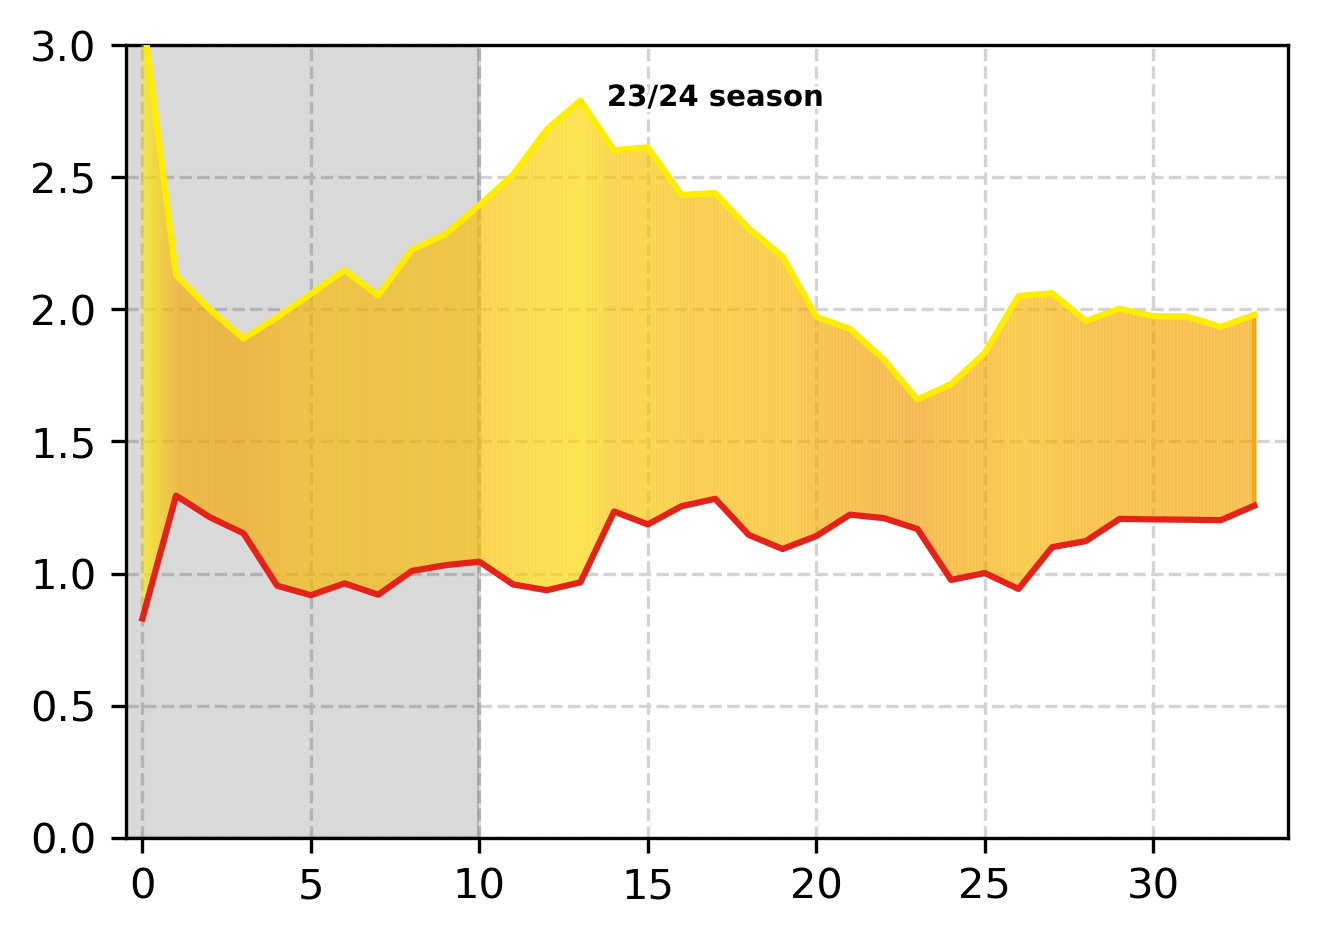

In [28]:
fig = plt.figure(figsize=(5, 3.5), dpi=300)
ax = plt.subplot(111)
plot_xG_gradient(ax, 10269, 10)

In [29]:
list(big_six_cm.keys())

['8178',
 '10269',
 '9823',
 '178475',
 '9789',
 '9810',
 '8226',
 '94937',
 '8697',
 '8358',
 '8406',
 '8721',
 '9905',
 '9788',
 '8149',
 '9911',
 '8722',
 '8262']

## 1. Premier League

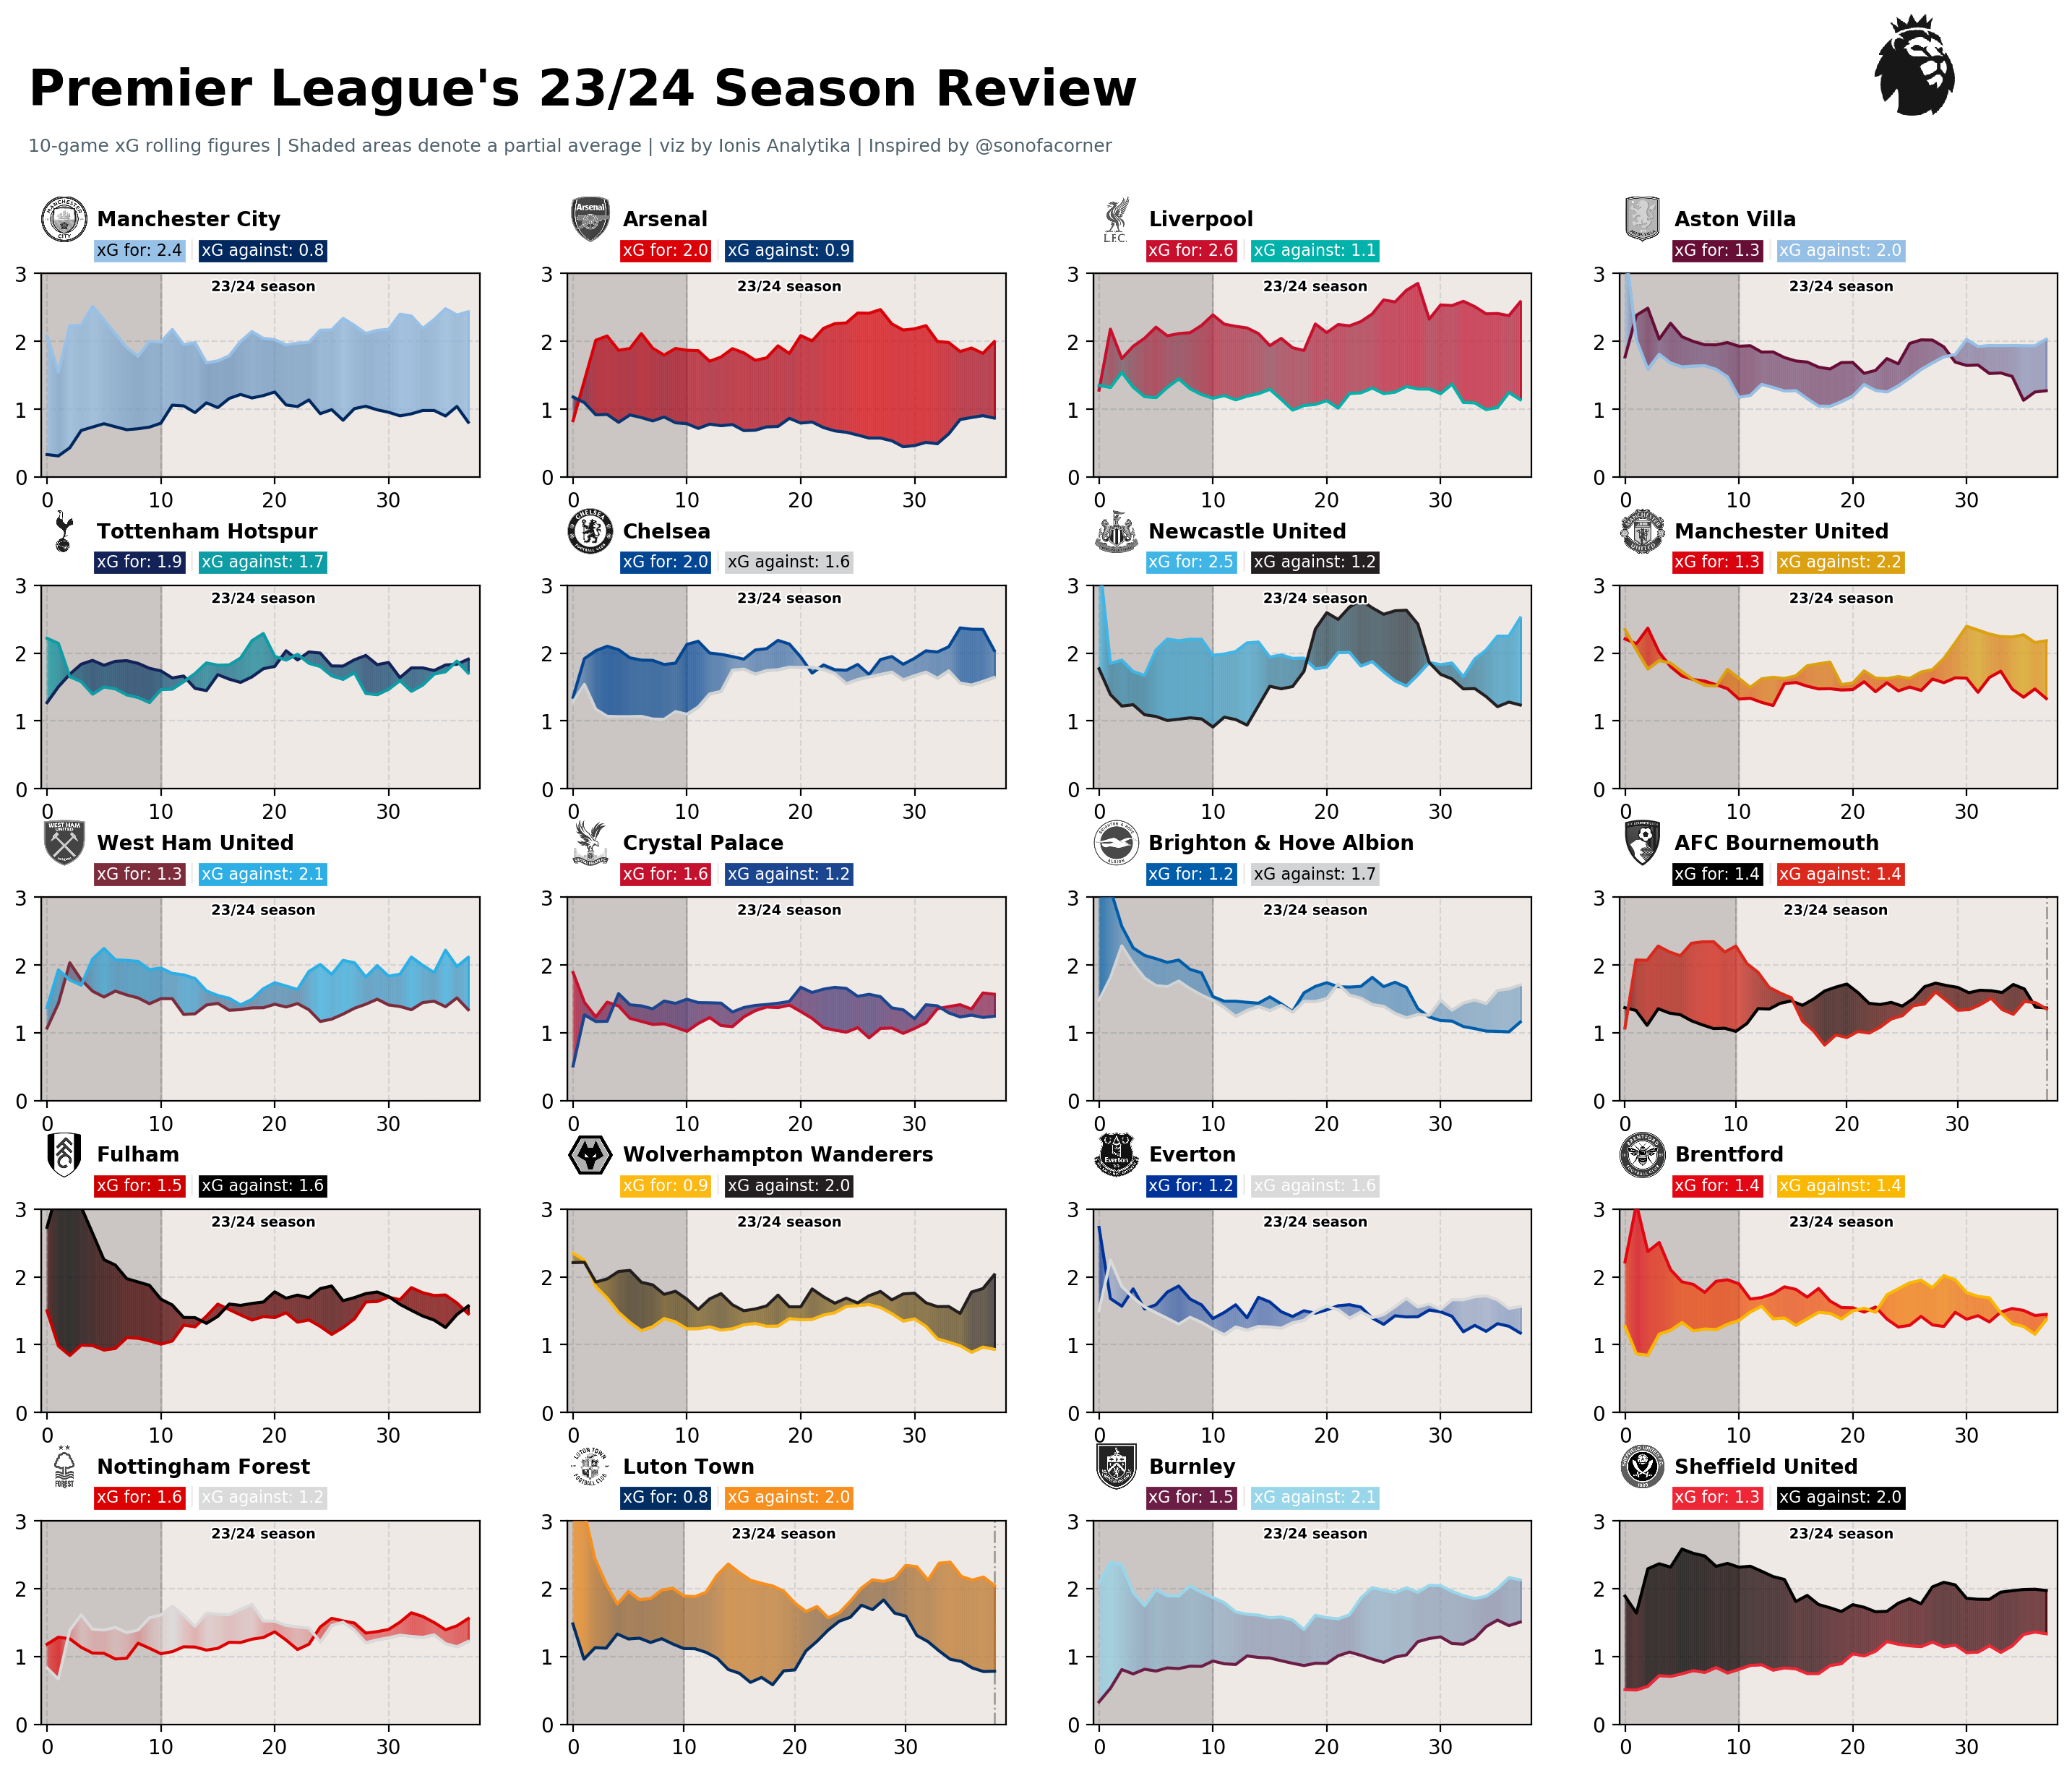

In [20]:
# ---- for path effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=1.5, foreground="black")

# ---- Setup the figure and gridspec
fig = plt.figure(figsize=(18, 14), dpi=200)  # Slightly smaller figure size
nrows = 10
ncols = 4

# GridSpec with 10 rows and 4 columns
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.1 if x % 2 != 0 else (1/nrows)/2.1 for x in range(nrows)], hspace=0.25
)

plot_counter = 0
logo_counter = 0

for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:  # Rows for plots
            ax = plt.subplot(
                gspec[row, col],
                facecolor="#EFE9E6"
            )
            if plot_counter < len(big_six_cm):
                teamId = list(big_six_cm.keys())[plot_counter]
                teamId = int(teamId)
                plot_xG_gradient(ax, teamId, 10)
                plot_counter += 1

        else:  # Rows for logos and text
            if logo_counter < len(big_six_cm):
                teamId = list(big_six_cm.keys())[logo_counter]
                color_1 = big_six_cm[str(teamId)]['low']
                color_2 = big_six_cm[str(teamId)]['high']

                # Adjust text colors based on the background
                color_1_t = 'black' if color_1 == '#d1d3d4' else 'white'
                color_2_t = 'black' if color_2 == '#97c1e7' else 'white'

                teamId = int(teamId)
                df_for_text = get_xG_rolling_data(teamId, 10)
                teamName = df_for_text['team_name'].iloc[0]
                xG_for = df_for_text['rolling_xG_for'].iloc[-1]
                xG_ag = df_for_text['rolling_xG_ag'].iloc[-1]

                # Plot the team logo
                fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
                logo_ax = plt.subplot(
                    gspec[row, col],
                    anchor='NW', facecolor='#EFE9E6'
                )
                club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
                logo_ax.imshow(club_icon)
                logo_ax.axis('off')

                # Add the team name and xG text
                ax_text(
                    x=1.2,
                    y=0.7,
                    s=f'<{teamName}>\n<xG for: {xG_for:.1f}> <|> <xG against: {xG_ag:.1f}>',
                    ax=logo_ax,
                    highlight_textprops=[
                        {'weight': 'bold'},
                        {'size': '8', 'bbox': {'edgecolor': color_2, 'facecolor': color_2, 'pad': 1}, 'color': color_2_t},
                        {'color': '#EFE9E6'},
                        {'size': '8', 'bbox': {'edgecolor': color_1, 'facecolor': color_1, 'pad': 1}, 'color': color_1_t}
                    ],
                    ha='left',
                    size=10,
                    annotationbbox_kw={'xycoords': 'axes fraction'}
                )
                logo_counter += 1

# Title and footer text
fig_text(
    x=0.12, y=0.92,
    s='Premier League\'s 23/24 Season Review',
    va='bottom', ha='left',
    fontsize=25, color='black', weight='bold'
)
fig_text(
    x=0.12, y=.90,
    s='10-game xG rolling figures | Shaded areas denote a partial average | viz by Ionis Analytika | Inspired by @sonofacorner',
    va='bottom', ha='left',
    fontsize=9, color='#4E616C'
)

# Add the league logo
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes([.82, .92, .05, .05])  # Adjust position for the more compact figure
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{47:.0f}.png')).convert('LA')
logo_ax.imshow(club_icon)
logo_ax.axis('off')

#Uncomment the following lines to save the plot
plt.savefig(
    "C:/Users/jeffr/OneDrive/Desktop/Github Activities/Sports_Analysis/Football/11 Rolling xG/Figures/epl_23_24.png",
    dpi=600,
    facecolor="#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False
)


## 2. Bundesliga

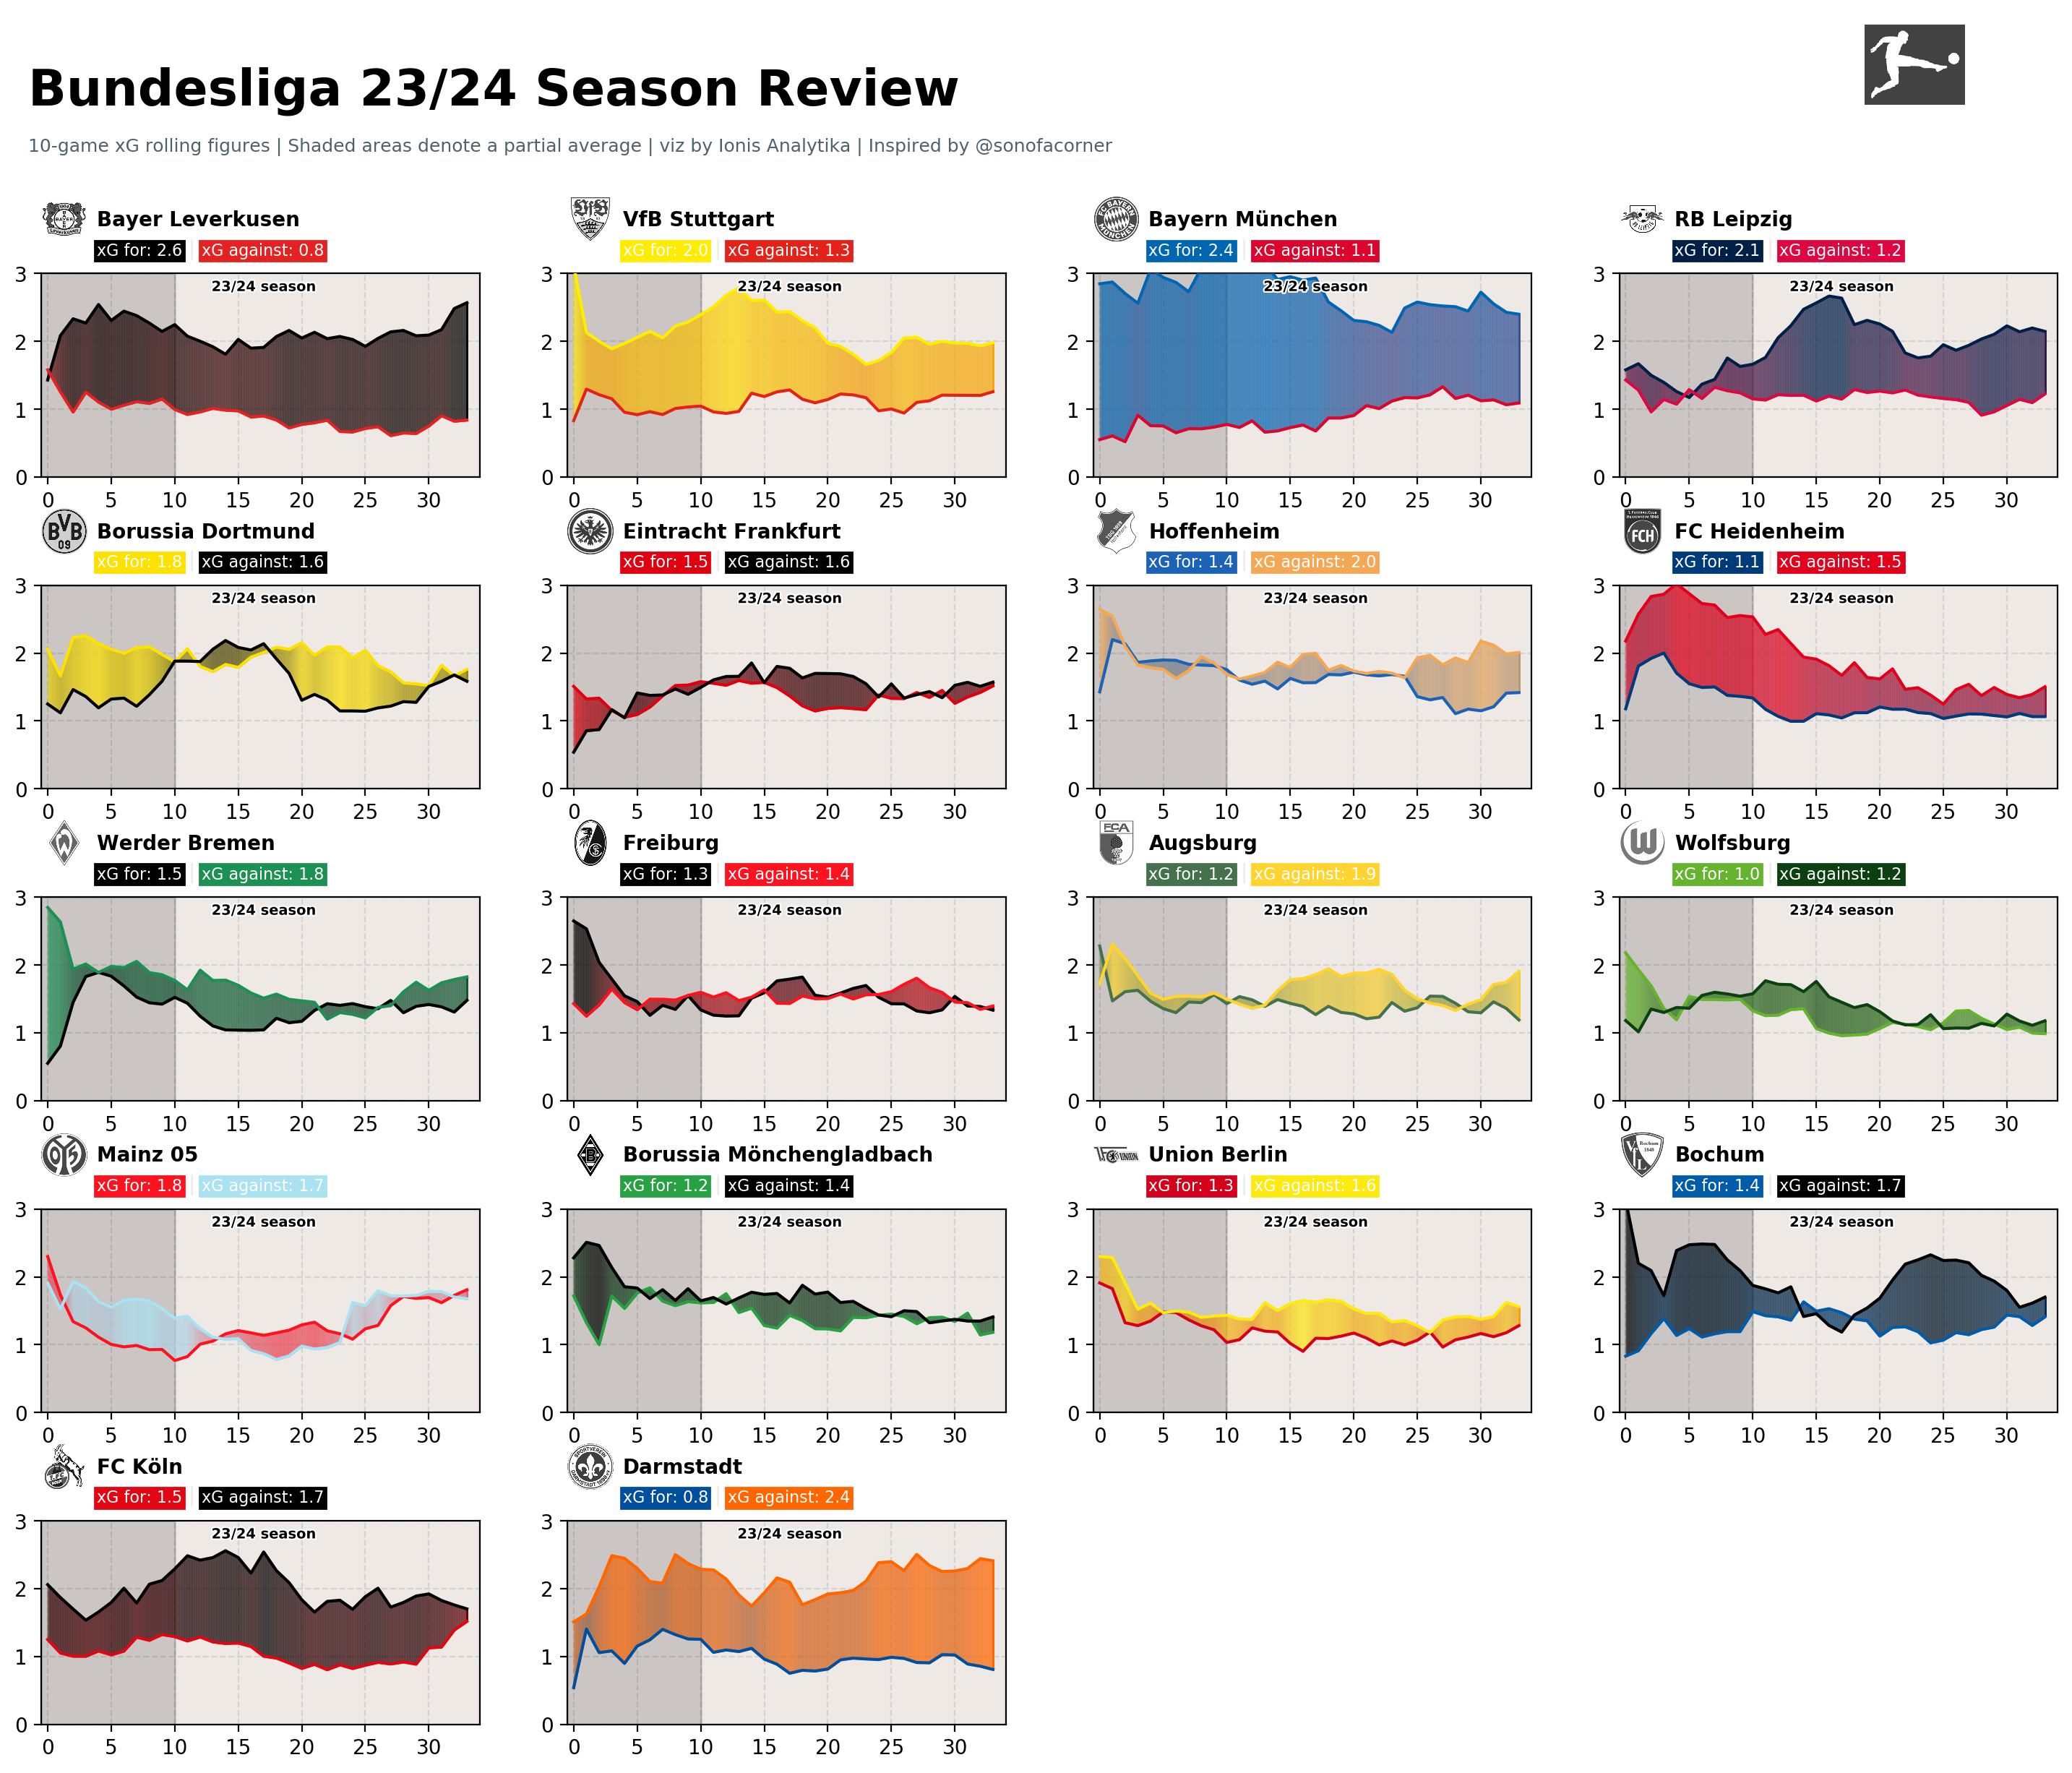

In [30]:
# ---- for path effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=1.5, foreground="black")

# ---- Setup the figure and gridspec
fig = plt.figure(figsize=(18, 14), dpi=200)  # Slightly smaller figure size
nrows = 10
ncols = 4

# GridSpec with 10 rows and 4 columns
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.1 if x % 2 != 0 else (1/nrows)/2.1 for x in range(nrows)], hspace=0.25
)

plot_counter = 0
logo_counter = 0
max_teams = len(big_six_cm)  # The maximum number of teams, 18 in this case

for row in range(nrows):
    if plot_counter >= max_teams and logo_counter >= max_teams:
        break  # Exit the loop if all plots and logos are done
    
    for col in range(ncols):
        if row % 2 != 0:  # Rows for plots
            if plot_counter < max_teams:
                ax = plt.subplot(
                    gspec[row, col],
                    facecolor="#EFE9E6"
                )
                teamId = list(big_six_cm.keys())[plot_counter]
                teamId = int(teamId)
                plot_xG_gradient(ax, teamId, 10)
                plot_counter += 1
            else:
                break  # Stop plotting when reaching the max number of teams

        else:  # Rows for logos and text
            if logo_counter < max_teams:
                teamId = list(big_six_cm.keys())[logo_counter]
                color_1 = big_six_cm[str(teamId)]['low']
                color_2 = big_six_cm[str(teamId)]['high']

                # Adjust text colors based on the background
                color_1_t = 'black' if color_1 == '#d1d3d4' else 'white'
                color_2_t = 'black' if color_2 == '#97c1e7' else 'white'

                teamId = int(teamId)
                df_for_text = get_xG_rolling_data(teamId, 10)
                teamName = df_for_text['team_name'].iloc[0]
                xG_for = df_for_text['rolling_xG_for'].iloc[-1]
                xG_ag = df_for_text['rolling_xG_ag'].iloc[-1]

                # Plot the team logo
                fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
                logo_ax = plt.subplot(
                    gspec[row, col],
                    anchor='NW', facecolor='#EFE9E6'
                )
                club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
                logo_ax.imshow(club_icon)
                logo_ax.axis('off')

                # Add the team name and xG text
                ax_text(
                    x=1.2,
                    y=0.7,
                    s=f'<{teamName}>\n<xG for: {xG_for:.1f}> <|> <xG against: {xG_ag:.1f}>',
                    ax=logo_ax,
                    highlight_textprops=[
                        {'weight': 'bold'},
                        {'size': '8', 'bbox': {'edgecolor': color_2, 'facecolor': color_2, 'pad': 1}, 'color': color_2_t},
                        {'color': '#EFE9E6'},
                        {'size': '8', 'bbox': {'edgecolor': color_1, 'facecolor': color_1, 'pad': 1}, 'color': color_1_t}
                    ],
                    ha='left',
                    size=10,
                    annotationbbox_kw={'xycoords': 'axes fraction'}
                )
                logo_counter += 1
            else:
                break  # Stop adding logos when reaching the max number of teams

# Title and footer text
fig_text(
    x=0.12, y=0.92,
    s='Bundesliga 23/24 Season Review',
    va='bottom', ha='left',
    fontsize=25, color='black', weight='bold'
)
fig_text(
    x=0.12, y=.90,
    s='10-game xG rolling figures | Shaded areas denote a partial average | viz by Ionis Analytika | Inspired by @sonofacorner',
    va='bottom', ha='left',
    fontsize=9, color='#4E616C'
)

# Add the league logo
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes([.82, .92, .05, .05])  # Adjust position for the more compact figure
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{54:.0f}.png')).convert('LA')
logo_ax.imshow(club_icon)
logo_ax.axis('off')

#Uncomment the following lines to save the plot
plt.savefig(
    "C:/Users/jeffr/OneDrive/Desktop/Github Activities/Sports_Analysis/Football/11 Rolling xG/Figures/bundesliga_23_24.png",
    dpi=600,
    facecolor="#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False
)